In [1]:
import pandas as pd
import numpy as np
from nltk import pos_tag
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

import warnings
warnings.simplefilter("ignore")

In [2]:
tweets=pd.read_csv(r"D:\ExcelR Data Science\Assignments\Text Mining\Elon_musk.csv", encoding='cp1252')

In [3]:
tweets=tweets.drop('Unnamed: 0',axis=1)

In [4]:
tweets.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
tweets.shape

(1999, 1)

In [6]:
tweets.isnull().sum()

Text    0
dtype: int64

In [7]:
tweets.dtypes

Text    object
dtype: object

In [8]:
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
tweets.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [10]:
tweets['Text'] = tweets['Text'].apply(clean_text)
tweets.head()

,Text
0,i’m an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


### Tokenization,Stopwords remove,Pos_tagging,Stemming

In [11]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
                    newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist


In [12]:
tweets['POStagged'] = tweets['Text'].apply(token_stop_pos)
tweets.head()


,Text,POStagged
0,i’m an alien,"[(’, v), (alien, n)]"
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[(idaacarmack, n), (ray, n), (tracing, v), (cy..."
2,joerogan spotify great interview,"[(joerogan, a), (spotify, v), (great, a), (int..."
3,doge is underestimated,"[(doge, n), (underestimated, a)]"
4,teslacn congratulations tesla china for amazin...,"[(teslacn, a), (congratulations, n), (tesla, v..."


In [13]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [14]:
tweets['Lemma'] = tweets['POStagged'].apply(lemmatize)

In [15]:
tweets.head()

,Text,POStagged,Lemma
0,i’m an alien,"[(’, v), (alien, n)]",’ alien
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[(idaacarmack, n), (ray, n), (tracing, v), (cy...",idaacarmack ray trace cyberpunk hdr nextleve...
2,joerogan spotify great interview,"[(joerogan, a), (spotify, v), (great, a), (int...",joerogan spotify great interview
3,doge is underestimated,"[(doge, n), (underestimated, a)]",doge underestimated
4,teslacn congratulations tesla china for amazin...,"[(teslacn, a), (congratulations, n), (tesla, v...",teslacn congratulation tesla china amaze exe...


In [16]:
tweets[['Text','Lemma']]

,Text,Lemma
0,i’m an alien,’ alien
1,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray trace cyberpunk hdr nextleve...
2,joerogan spotify great interview,joerogan spotify great interview
3,doge is underestimated,doge underestimated
4,teslacn congratulations tesla china for amazin...,teslacn congratulation tesla china amaze exe...
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,flcnhvy true sound surreal negative propagan...
1995,ppathole make sure to read ur terms amp condit...,ppathole make sure read ur term amp conditio...
1996,teslagong ppathole samwise gamgee,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is,ppathole altho dumb dumber


### Sentiment Analysis using TextBlob:
      The two measures that are used to analyze the sentiment are:
      Polarity – talks about how positive or negative the opinion is-ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)
      Subjectivity – talks about how subjective the opinion is-ranges from 0 to 1(0 being very objective and 1 being very subjective)

In [17]:
#!pip install textblob

In [18]:
from textblob import TextBlob
# func to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# func to get Polartity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# Func to get score
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [19]:
tweets['Subjectivity'] = tweets['Lemma'].apply(getSubjectivity) 
tweets['Polarity'] = tweets['Lemma'].apply(getPolarity) 
tweets['Analysis'] = tweets['Polarity'].apply(analysis)
tweets.head(15)

,Text,POStagged,Lemma,Subjectivity,Polarity,Analysis
0,i’m an alien,"[(’, v), (alien, n)]",’ alien,0.750000,-0.250000,Negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[(idaacarmack, n), (ray, n), (tracing, v), (cy...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,joerogan spotify great interview,"[(joerogan, a), (spotify, v), (great, a), (int...",joerogan spotify great interview,0.750000,0.800000,Positive
3,doge is underestimated,"[(doge, n), (underestimated, a)]",doge underestimated,0.000000,0.000000,Neutral
4,teslacn congratulations tesla china for amazin...,"[(teslacn, a), (congratulations, n), (tesla, v...",teslacn congratulation tesla china amaze exe...,0.033333,0.000000,Neutral
5,happy new year of the ox,"[(happy, a), (new, a), (year, n), (ox, n)]",happy new year ox,0.727273,0.468182,Positive
6,frodo was the underdogeall thought he would fa...,"[(frodo, n), (underdogeall, a), (thought, n), ...",frodo underdogeall thought would failhimself,0.000000,0.000000,Neutral
7,owensparks flcnhvy haha thanks,"[(owensparks, n), (flcnhvy, v), (haha, a), (th...",owensparks flcnhvy haha thanks,0.250000,0.200000,Positive
8,flcnhvy indeed tweets definitely do not repre...,"[(flcnhvy, n), (indeed, r), (tweets, n), (defi...",flcnhvy indeed tweet definitely represent re...,0.500000,0.000000,Neutral
9,the most entertaining outcome is the most likely,"[(entertaining, a), (outcome, n), (likely, a)]",entertaining outcome likely,0.850000,0.250000,Positive


In [20]:
# Count the no.of.Positive,Neative,Netural

review_count=tweets.Analysis.value_counts()
review_count

Neutral     974
Positive    821
Negative    204
Name: Analysis, dtype: int64

### Sentiment Analysis using VADER-
       Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.
       positive if compound >= 0.5
       neutral if -0.5 < compound < 0.5
       negative if -0.5 >= compound

In [21]:
#!pip install vaderSentiment

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
tweets['VaderSentiment'] = tweets['Lemma'].apply(vadersentimentanalysis)


# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
#tweets['VadetAnalysis']=tweets['']
tweets['VaderAnalysis'] = tweets['VaderSentiment'].apply(vader_analysis)
tweets.head()

,Text,POStagged,Lemma,Subjectivity,Polarity,Analysis,VaderSentiment,VaderAnalysis
0,i’m an alien,"[(’, v), (alien, n)]",’ alien,0.750000,-0.25,Negative,0.0000,Neutral
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[(idaacarmack, n), (ray, n), (tracing, v), (cy...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000,0.00,Neutral,0.0000,Neutral
2,joerogan spotify great interview,"[(joerogan, a), (spotify, v), (great, a), (int...",joerogan spotify great interview,0.750000,0.80,Positive,0.6249,Positive
3,doge is underestimated,"[(doge, n), (underestimated, a)]",doge underestimated,0.000000,0.00,Neutral,-0.2732,Neutral
4,teslacn congratulations tesla china for amazin...,"[(teslacn, a), (congratulations, n), (tesla, v...",teslacn congratulation tesla china amaze exe...,0.033333,0.00,Neutral,0.8126,Positive


In [24]:
vader_count=tweets.VaderAnalysis.value_counts()
vader_count

Neutral     1616
Positive     339
Negative      44
Name: VaderAnalysis, dtype: int64

([<matplotlib.patches.Wedge at 0x2add81edca0>,
 [Text(-0.9066775107016879, 0.6228449980434865, 'Neutral'),
  Text(0.8614755019828008, -0.6840028943531463, 'Positive'),
  Text(1.3467736645767177, -0.093277523565961, 'Negative')],
 [Text(-0.49455136947364786, 0.3397336352964471, '80.8%'),
  Text(0.4698957283542549, -0.3730924878289889, '17.0%'),
  Text(0.8479686036223778, -0.05873029261560507, '2.2%')])

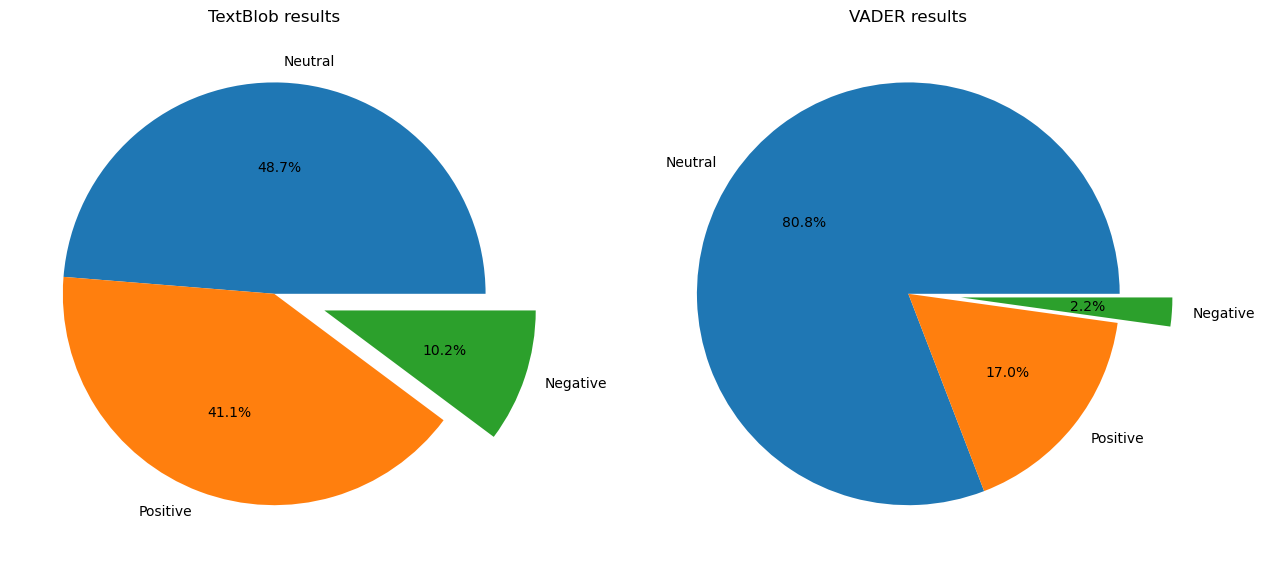

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("TextBlob results")
plt.pie(review_count.values, labels = review_count.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)
plt.title("VADER results")
plt.pie(vader_count.values, labels = vader_count.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [26]:
tweets.head()

,Text,POStagged,Lemma,Subjectivity,Polarity,Analysis,VaderSentiment,VaderAnalysis
0,i’m an alien,"[(’, v), (alien, n)]",’ alien,0.750000,-0.25,Negative,0.0000,Neutral
1,idaacarmack ray tracing on cyberpunk with hdr ...,"[(idaacarmack, n), (ray, n), (tracing, v), (cy...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000,0.00,Neutral,0.0000,Neutral
2,joerogan spotify great interview,"[(joerogan, a), (spotify, v), (great, a), (int...",joerogan spotify great interview,0.750000,0.80,Positive,0.6249,Positive
3,doge is underestimated,"[(doge, n), (underestimated, a)]",doge underestimated,0.000000,0.00,Neutral,-0.2732,Neutral
4,teslacn congratulations tesla china for amazin...,"[(teslacn, a), (congratulations, n), (tesla, v...",teslacn congratulation tesla china amaze exe...,0.033333,0.00,Neutral,0.8126,Positive


In [27]:
clean_tweets=' '.join(tweets['Lemma'])
clean_tweets

'  ’ alien   idaacarmack ray trace cyberpunk hdr nextlevel try   joerogan spotify great interview   doge underestimated   teslacn congratulation tesla china amaze execution last year next even   happy new year ox   frodo underdogeall thought would failhimself   owensparks flcnhvy haha thanks   flcnhvy indeed tweet definitely represent realworld time allocation   entertaining outcome likely   givedirectly send   agree clubhouse kanyewest     geoffkeighley unrealengine ’ get real   buy dogecoin lil x toddler hodler   joshmanmode definitely issue sentencing seem bit high   freewalletorg thanks fix   freewalletorg please unlock account   astrojordy   true power haha   freewalletorg crypto wallet ’ give private key avoid cost   freewalletorg app suck   rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission   ajtourville yes   rationaletienne adamklotz predict cash flow reasonably well starlink ipo   rationaletienne adamklotz starlink staggeringly diff

In [28]:
import spacy
nlp=spacy.load('en_core_web_sm')
one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

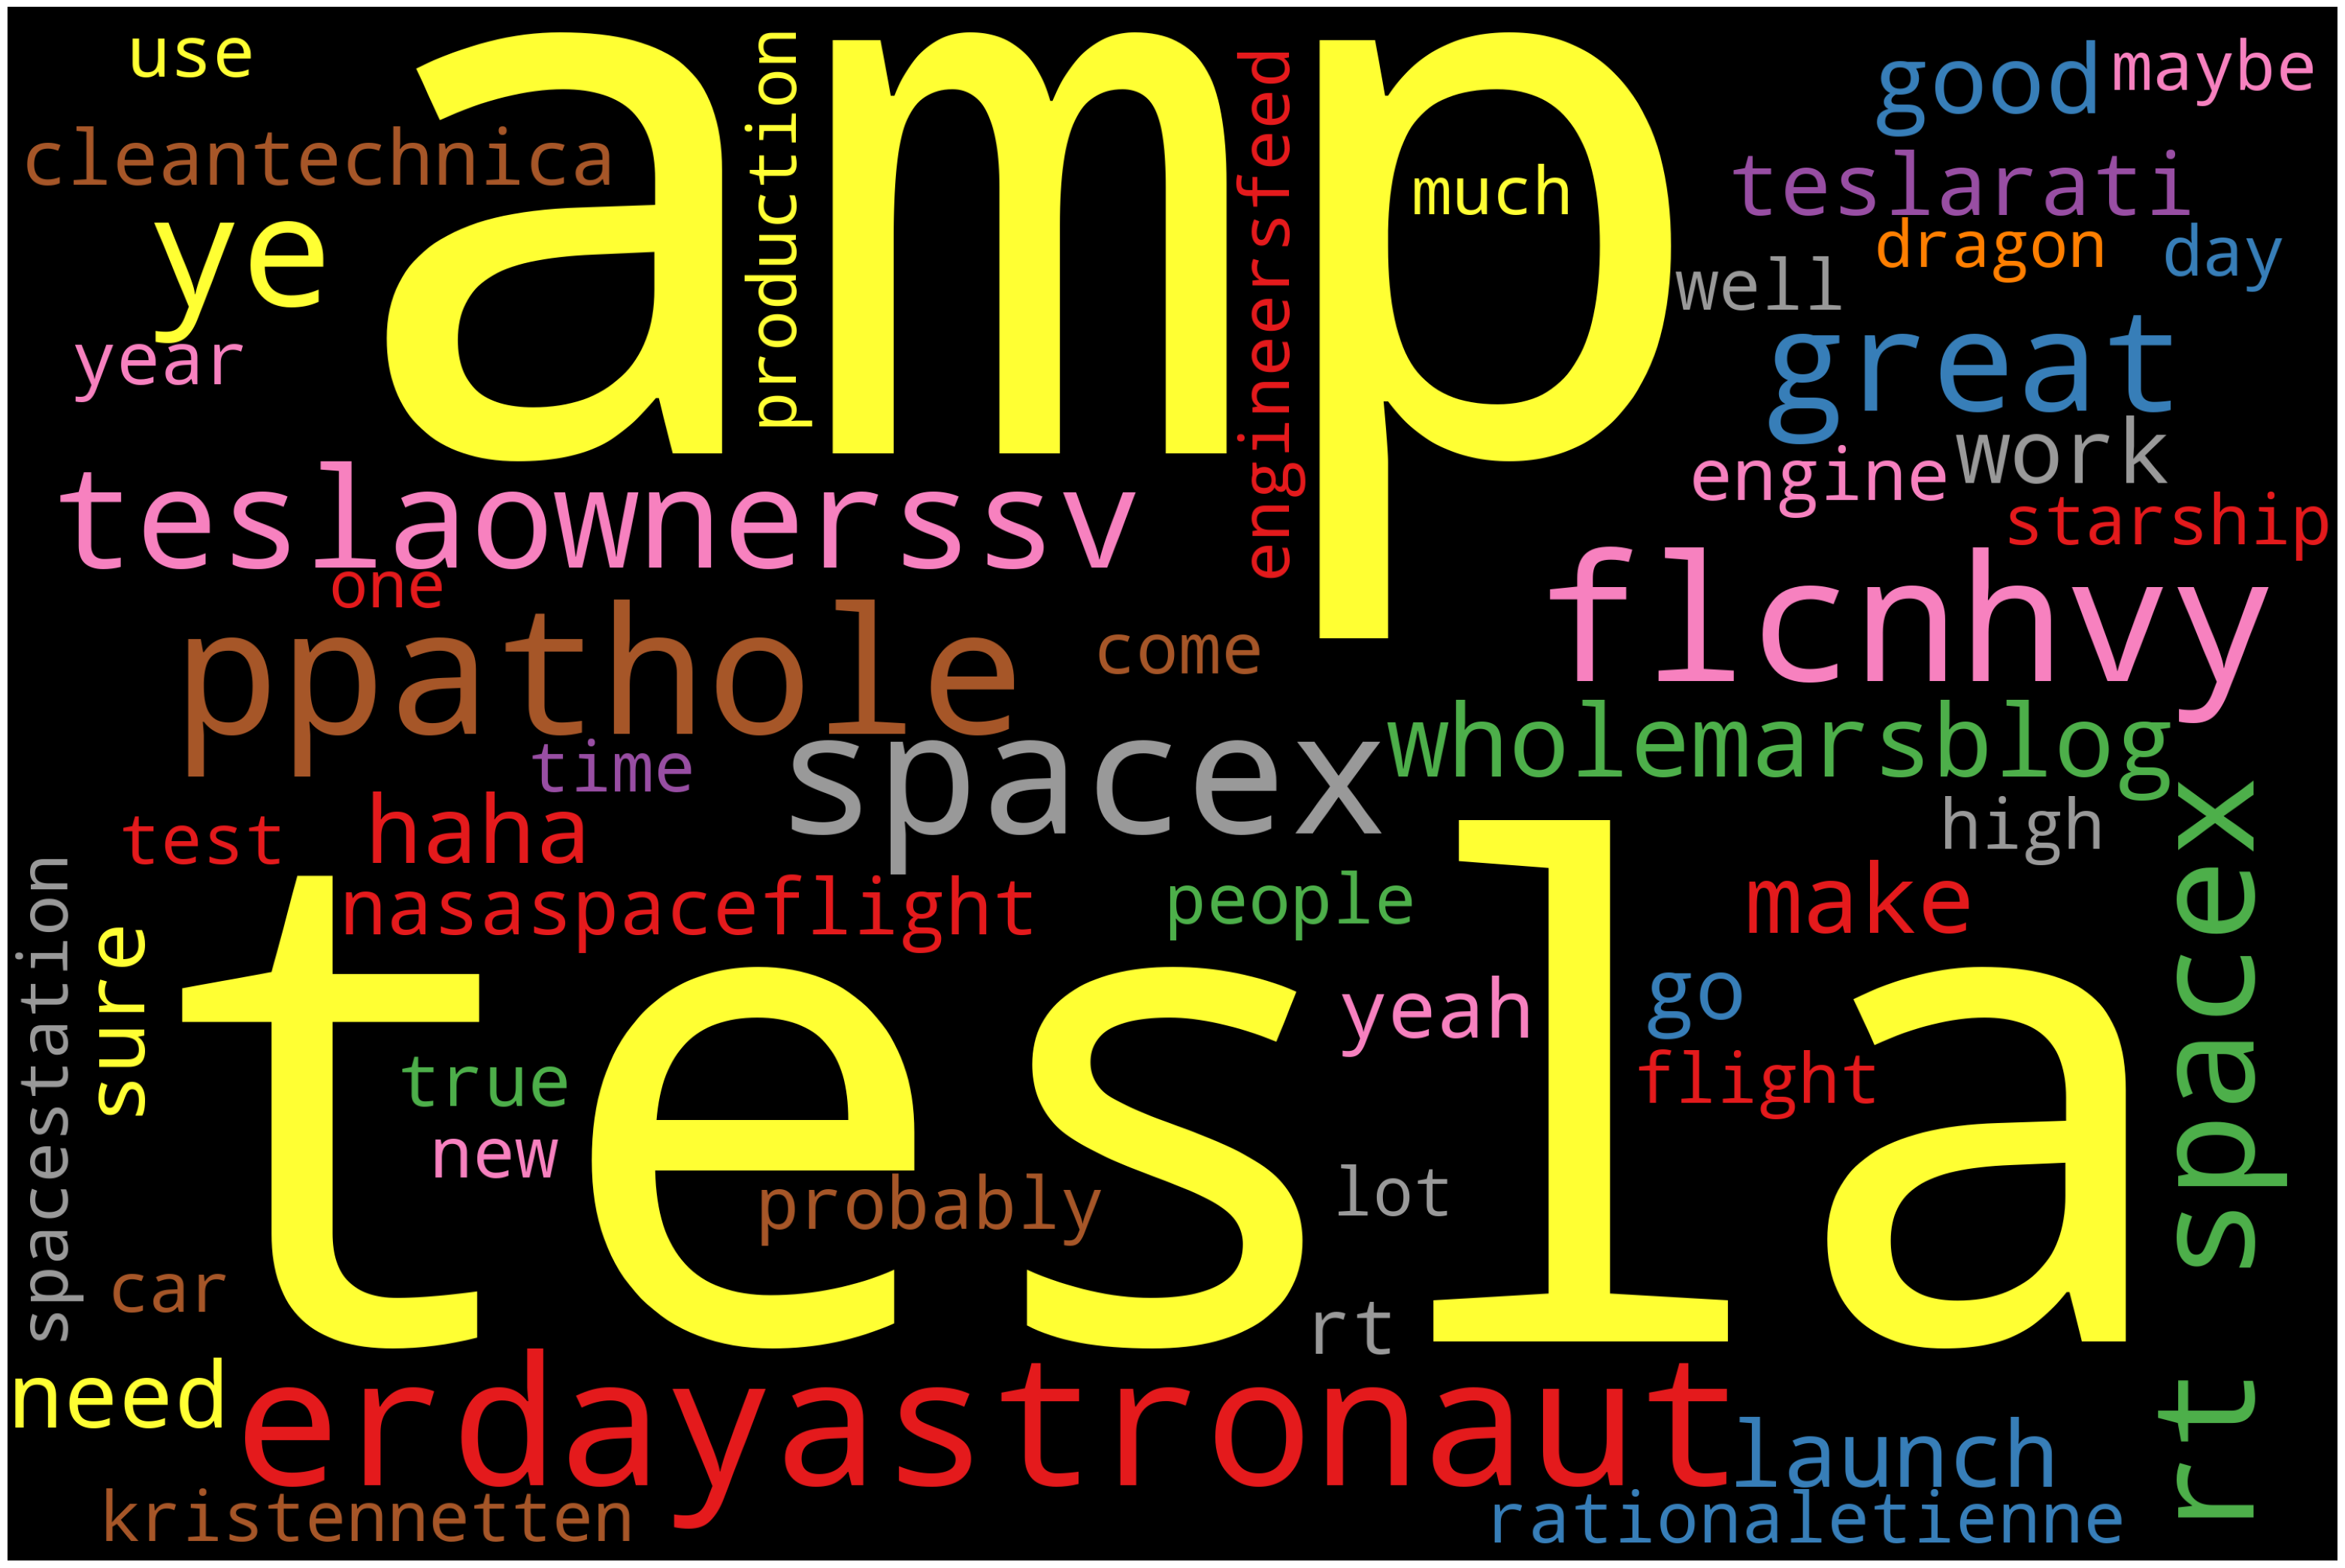

In [29]:

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1').generate(clean_tweets)
plot_cloud(wordcloud)

In [30]:
df = tweets[['Text','Lemma', 'Analysis']].copy()

In [31]:
df.head()

,Text,Lemma,Analysis
0,i’m an alien,’ alien,Negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray trace cyberpunk hdr nextleve...,Neutral
2,joerogan spotify great interview,joerogan spotify great interview,Positive
3,doge is underestimated,doge underestimated,Neutral
4,teslacn congratulations tesla china for amazin...,teslacn congratulation tesla china amaze exe...,Neutral


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Analysis']=le.fit_transform(df['Analysis'])
print(df["Analysis"].unique())

[0 1 2]


In [33]:
df.head()

,Text,Lemma,Analysis
0,i’m an alien,’ alien,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,idaacarmack ray trace cyberpunk hdr nextleve...,1
2,joerogan spotify great interview,joerogan spotify great interview,2
3,doge is underestimated,doge underestimated,1
4,teslacn congratulations tesla china for amazin...,teslacn congratulation tesla china amaze exe...,1


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features = 500)
X =vectorizer.fit_transform(df['Lemma'])
print(vectorizer.get_feature_names())


['absolutely', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'air', 'ajtourville', 'almost', 'already', 'also', 'although', 'amaze', 'amp', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'astrobehnken', 'astrobehnken astrodoug', 'astrodoug', 'astrojordy', 'astronaut', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'bbcsciencenews', 'become', 'benmezrich', 'berlin', 'berniesanders', 'best', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'body flap', 'booster', 'boringcompany', 'build', 'buy', 'call', 'camera', 'car', 'cargo', 'casparstanley', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'come soon', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'course still', 'course still love', 'crew', 'crew dragon', 'cyberpunkgame', 'data', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'djsnm', 'dmcryan', 'do', 

In [35]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
X.shape

(1999, 500)

In [37]:
y=df['Analysis']
print(y.shape)

(1999,)


In [38]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({1: 974, 2: 821, 0: 204})
Resampled dataset shape Counter({0: 974, 1: 974, 2: 974})


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [40]:
X_train.shape

(2191, 500)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
model = LogisticRegression()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.7441860465116279

 clasification report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75       234
           1       0.74      0.64      0.69       260
           2       0.88      0.74      0.80       237

    accuracy                           0.74       731
   macro avg       0.76      0.75      0.75       731
weighted avg       0.76      0.74      0.74       731


 confusion matrix:
 [[203  26   5]
 [ 76 166  18]
 [ 30  32 175]]


In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.5458276333789329

 clasification report:
               precision    recall  f1-score   support

           0       0.44      0.85      0.58       234
           1       0.68      0.50      0.58       260
           2       0.81      0.30      0.43       237

    accuracy                           0.55       731
   macro avg       0.64      0.55      0.53       731
weighted avg       0.65      0.55      0.53       731


 confusion matrix:
 [[198  35   1]
 [114 131  15]
 [140  27  70]]


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.79890560875513

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       234
           1       0.73      0.85      0.78       260
           2       0.87      0.74      0.80       237

    accuracy                           0.80       731
   macro avg       0.81      0.80      0.80       731
weighted avg       0.81      0.80      0.80       731


 confusion matrix:
 [[187  43   4]
 [ 16 222  22]
 [ 21  41 175]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.8358413132694938

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       234
           1       0.76      0.88      0.81       260
           2       0.92      0.79      0.85       237

    accuracy                           0.84       731
   macro avg       0.85      0.83      0.84       731
weighted avg       0.84      0.84      0.84       731


 confusion matrix:
 [[195  36   3]
 [ 17 229  14]
 [ 13  37 187]]


In [45]:
from xgboost import XGBClassifier
model = XGBClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.8180574555403557

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       234
           1       0.74      0.89      0.81       260
           2       0.90      0.75      0.82       237

    accuracy                           0.82       731
   macro avg       0.83      0.82      0.82       731
weighted avg       0.83      0.82      0.82       731


 confusion matrix:
 [[189  37   8]
 [ 17 232  11]
 [ 17  43 177]]


In [46]:
from keras import models
from keras import layers


In [47]:
model = models.Sequential()

In [48]:
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(500, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                25050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                2

In [49]:
model.compile(
optimizer = "adam",
loss = "binary_crossentropy",
metrics = ["accuracy"]
)

In [50]:
X_train=X_train.toarray()
#y_train=y_train.toarray()
X_test=X_test.toarray()
#y_test=y_test.toarray()

In [51]:
results = model.fit(X_train, y_train,
epochs= 100,

validation_data = (X_test, y_test)
)

Epoch 1/100
69/69 [==============================] - 8s 13ms/step - loss: 0.0389 - accuracy: 0.3250 - val_loss: -0.8633 - val_accuracy: 0.3557
Epoch 2/100
69/69 [==============================] - 0s 6ms/step - loss: -11.5380 - accuracy: 0.3259 - val_loss: -45.5571 - val_accuracy: 0.3557
Epoch 3/100
69/69 [==============================] - 0s 5ms/step - loss: -413.2386 - accuracy: 0.3259 - val_loss: -1095.0016 - val_accuracy: 0.3557
Epoch 4/100
69/69 [==============================] - 0s 5ms/step - loss: -4547.6709 - accuracy: 0.3259 - val_loss: -9224.2129 - val_accuracy: 0.3557
Epoch 5/100
69/69 [==============================] - 0s 5ms/step - loss: -25910.5430 - accuracy: 0.3259 - val_loss: -40514.7461 - val_accuracy: 0.3557
Epoch 6/100
69/69 [==============================] - 0s 6ms/step - loss: -91595.3359 - accuracy: 0.3259 - val_loss: -129421.6562 - val_accuracy: 0.3557
Epoch 7/100
69/69 [==============================] - 0s 5ms/step - loss: -260447.6406 - accuracy: 0.3282 - val_l

Epoch 53/100
69/69 [==============================] - 0s 6ms/step - loss: -6199632896.0000 - accuracy: 0.3428 - val_loss: -5310872064.0000 - val_accuracy: 0.3844
Epoch 54/100
69/69 [==============================] - 0s 6ms/step - loss: -6769887744.0000 - accuracy: 0.3446 - val_loss: -5720394240.0000 - val_accuracy: 0.3844
Epoch 55/100
69/69 [==============================] - 0s 7ms/step - loss: -7369511424.0000 - accuracy: 0.3455 - val_loss: -6161049088.0000 - val_accuracy: 0.3844
Epoch 56/100
69/69 [==============================] - 0s 5ms/step - loss: -7799754752.0000 - accuracy: 0.3469 - val_loss: -6624126464.0000 - val_accuracy: 0.3844
Epoch 57/100
69/69 [==============================] - 0s 5ms/step - loss: -8444150272.0000 - accuracy: 0.3355 - val_loss: -7112891392.0000 - val_accuracy: 0.3844
Epoch 58/100
69/69 [==============================] - 0s 5ms/step - loss: -8979520512.0000 - accuracy: 0.3437 - val_loss: -7606934528.0000 - val_accuracy: 0.3844
Epoch 59/100
69/69 [========

In [52]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 38.44%
